In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
URL = "C:\\Users\\USER DK\\Downloads\\Canada.xlsx"

df = pd.read_excel(URL, sheet_name="Canada by Citizenship", skiprows=range(20), skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [99]:
df_clean = df.drop(columns=['AREA', 'Coverage', 'Type',])
df_clean.head()

,OdName,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [100]:
df_clean.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)
df_clean.columns

Index([  'Country', 'Continent',       'REG',    'Region',       'DEV',
         'DevName',        1980,        1981,        1982,        1983,
              1984,        1985,        1986,        1987,        1988,
              1989,        1990,        1991,        1992,        1993,
              1994,        1995,        1996,        1997,        1998,
              1999,        2000,        2001,        2002,        2003,
              2004,        2005,        2006,        2007,        2008,
              2009,        2010,        2011,        2012,        2013],
      dtype='object')

In [101]:
df_re_index = df_clean.set_index('Country')
df_re_index.index.name = None
df_re_index.head()

,Continent,REG,Region,DEV,DevName,1980,1981,1982,1983,1984,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Afghanistan,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [102]:
years = list(map(int, range(1980, 2014)))
years

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [103]:
df_re_index['Total'] = df_re_index[years].sum(axis=1)
df_re_index.head(5)

,Continent,REG,Region,DEV,DevName,1980,1981,1982,1983,1984,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Text(0, 0.5, 'Number of imigrants')

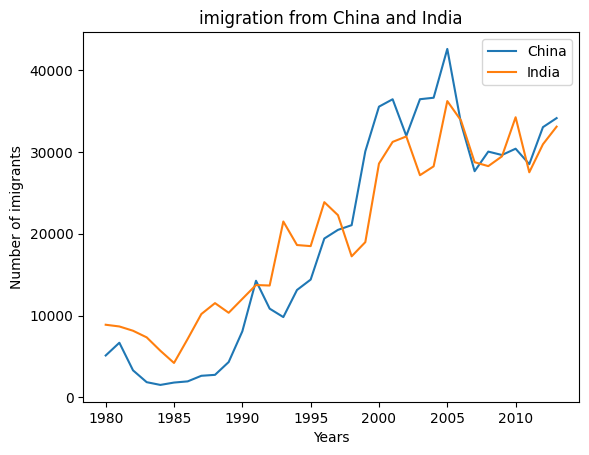

In [104]:
countries = ['China', 'India']
CI = df_re_index.loc[countries, years]
CI = CI.transpose()
CI.plot(kind='line')

plt.title('imigration from China and India')
plt.xlabel('Years')
plt.ylabel('Number of imigrants')